# Руссу Кирилл #
## Лабораторная работа №1 ##
## Вариант 5 ##

In [25]:
import pandas as pd
import random
import numpy
from folium import plugins
import folium
import matplotlib
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy import stats
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 10,5
Fire_data = pd.read_csv("cneos_fireball_data.csv", nrows=500000)

### 1.Определите местоположение метеорита с наибольшим количеством высвободившейся энергии. ###

In [102]:
Fire_data.loc[[Fire_data['Total Radiated Energy (J)'].idxmax()], ['Latitude (deg.)', 'Longitude (deg.)']]

,Latitude (deg.),Longitude (deg.)
146,54.8N,61.1E


### 2.Определить метеорит с максимальной и минимальной скоростью. ###

#### Так как колонки с именами метеоритов нет, буду выводить дату их проявления ####

#### Метеорит с максимальной скоростью ####

In [103]:
Fire_data.loc[[Fire_data['Velocity (km/s)'].idxmax()], ['Peak Brightness Date/Time (UT)', 'Velocity (km/s)']]

,Peak Brightness Date/Time (UT),Velocity (km/s)
67,2015-07-04 01:40:11,49.0


#### Метеорит с минимальной скоростью ####

In [104]:
Fire_data.loc[[Fire_data['Velocity (km/s)'].idxmin()], ['Peak Brightness Date/Time (UT)', 'Velocity (km/s)']]

,Peak Brightness Date/Time (UT),Velocity (km/s)
300,2008-07-01 17:40:19,9.8


### 4.Определить время года, в которое вероятность появления метеоритов максимальна. Постройте график ###

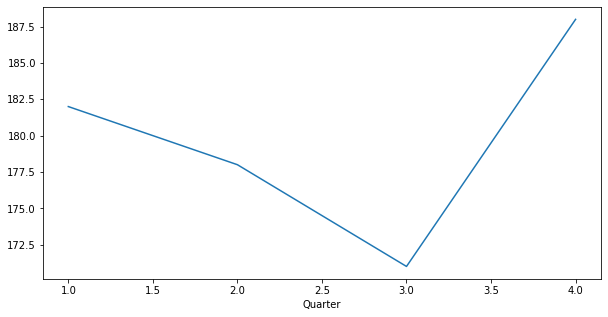

In [105]:
Fire_month = Fire_data
Fire_month['New_data'] = Fire_month['Peak Brightness Date/Time (UT)']
Fire_month['New_data'] = pd.to_datetime(Fire_month['New_data'])
Fire_month['Quarter'] = Fire_month['New_data'].dt.quarter
Fire_month.groupby(['Quarter'])['Quarter'].count().plot()

### 5.Удалите строки данных, в которых для метеоритов не указана скорость. Выведите размер набора до удаления и после. ###

### До удаления строк ###

In [106]:
Fire_data.shape

(719, 12)

### После уддаления ###

In [107]:
Fire_data = Fire_data.groupby(['Velocity (km/s)']).count()

In [108]:
Fire_data.shape

(103, 11)

### 6.Построить график, на котором по оси ОХ отложено время суток, а на оси OY частота появления метеоритов. ###

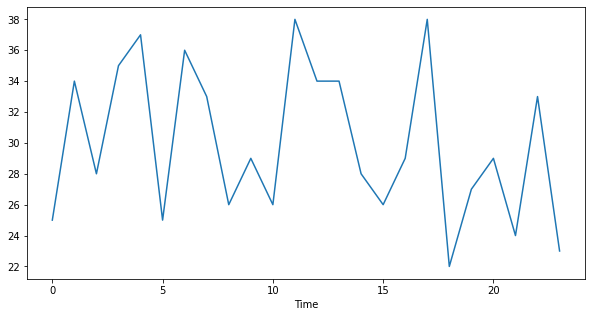

In [110]:
Fire_month['Time'] = Fire_month['New_data'].dt.hour
Fire_month.groupby(['Time'])['Time'].count().plot()

### 7.Заполните строки, в которых для метеоритов не указана скорость. ###

In [111]:
Fire_data.loc[Fire_data['Velocity (km/s)'].isnull(), 'Velocity (km/s)'] = random.uniform(1, 123)

In [114]:
Fire_data['Velocity (km/s)']

0      19.64958
1      17.20000
2      13.70000
3      15.20000
4      24.30000
         ...   
714    19.64958
715    19.64958
716    19.64958
717    19.64958
718    19.64958
Name: Velocity (km/s), Length: 719, dtype: float64

### 8.Определить месяц года, для которого появление метеоритов наболее вероятно(постройте графики) ###

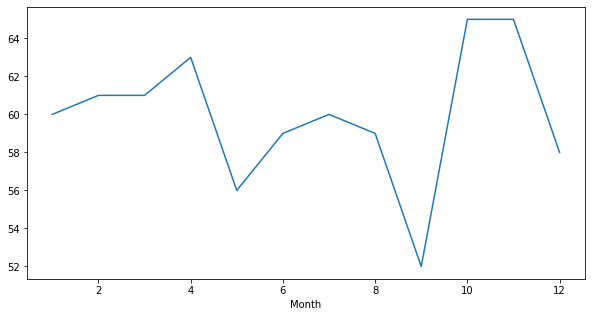

In [116]:
Fire_month = Fire_data
Fire_month['New_data'] = Fire_month['Peak Brightness Date/Time (UT)']
Fire_month['New_data'] = pd.to_datetime(Fire_month['New_data'])
Fire_month['Month'] = Fire_month['New_data'].dt.month
Fire_month.groupby(['Month'])['Month'].count().plot()

### 9.Вычислите корреляцию Пирсона и Спирмена между признаками Altitude и Total Radiated Energy. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value. ###

#### Кореляция ####

In [117]:
Fire_data = Fire_data[['Altitude (km)', 'Total Radiated Energy (J)']].dropna()
pearsonr(Fire_data['Altitude (km)'], Fire_data['Total Radiated Energy (J)'])

(-0.08578656525823586, 0.13368269878711372)

In [118]:
spearmanr(Fire_data['Altitude (km)'], Fire_data['Total Radiated Energy (J)'])

SpearmanrResult(correlation=-0.12671041939219074, pvalue=0.026415728610676672)

#### Гистограмма для Altitude ####

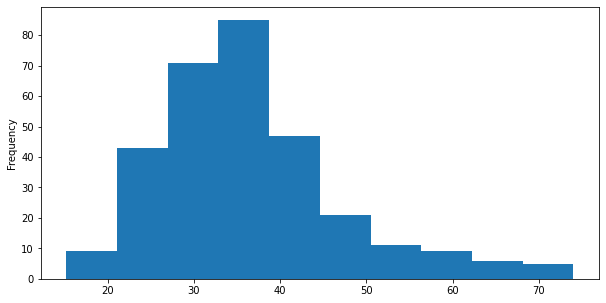

In [119]:
Gist = pd.Series(Fire_data['Altitude (km)'])
Gist.plot.hist()

#### Гистограмма для Total Radiated Energy ####

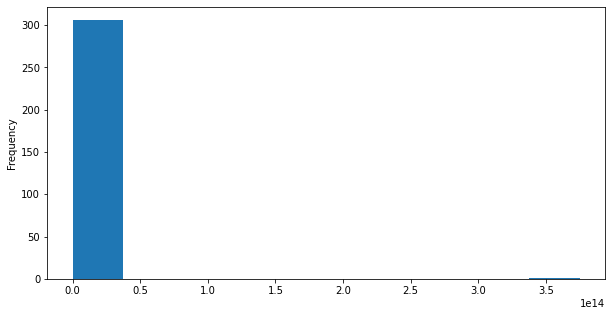

In [120]:
Gist = pd.Series(Fire_data['Total Radiated Energy (J)'])
Gist.plot.hist()

### 3.Определить место максимальной концентрации метеоритов ###

In [7]:
def get_longitude(name):
    if 'W' in name:
        return float(name.split('.')[0].strip())
    if 'E' in name:
        return -float(name.split('.')[0].strip())

In [8]:
def get_latitude(name):
    if 'S' in name:
        return float(name.split('.')[0].strip())
    if 'N' in name:
        return -float(name.split('.')[0].strip())

In [6]:
Fire_data_new = Fire_data

In [9]:
Fire_data_new = Fire_data_new[Fire_data_new['Latitude (deg.)'].notnull()]
Fire_data_new = Fire_data_new[Fire_data_new['Longitude (deg.)'].notnull()]

In [10]:
Fire_data_new['Latitude'] = Fire_data_new['Latitude (deg.)'].apply(get_latitude)
Fire_data_new['Longitude'] = Fire_data_new['Longitude (deg.)'].apply(get_longitude)

In [11]:
cols = ['Latitude', 'Longitude']

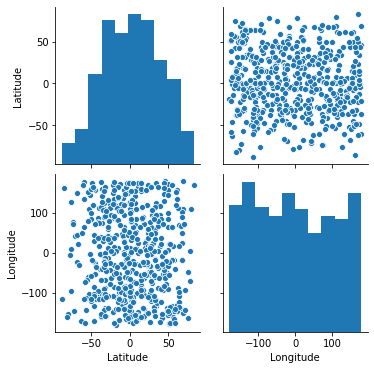

In [12]:
sns_plot = sns.pairplot(Fire_data_new[cols])

### Можно проилюстрировать тепловую карту, но это лишь как дополнение ###

In [35]:
world_map = folium.Map(location = []zoom_start=12)

In [26]:
points = (Fire_data_new.Latitude.fillna(0), Fire_data_new.Longitude.fillna(0))

In [27]:
coordinates = []

In [28]:
lat = points[0]
lon = points[1]

In [29]:
for la,lo in zip(lat,lon):
    coordinates.append([la,lo])

In [32]:
world_map.add_child(plugins.HeatMap(coordinates[0:4000]))